In [1]:
# Подключение библиотек
import numpy as np
import pandas as pd

In [2]:
# Чтение данных из файла
df = pd.read_csv('BigDataSchool_features.csv', header=0)
df.head(10)

,ID,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
0,2,1,4.0,133.0,28.0,NaN,0.0,NaN,518.98,2.60,...,89.0,137.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,958.0
1,2,2,NaN,132.0,29.0,24.0,0.0,578.35,574.98,2.80,...,141.0,93.0,NaN,2.0,3.0,1.0,0.0,0.0,2.0,936.0
2,2,3,NaN,131.0,NaN,29.0,0.0,430.13,426.32,0.93,...,128.0,114.0,1.0,3.0,3.0,1.0,0.0,0.0,1.0,919.0
3,2,4,4.0,130.0,31.0,7.0,NaN,479.33,477.13,0.00,...,3.0,137.0,0.0,3.0,3.0,1.0,0.0,0.0,3.0,618.0
4,2,5,8.0,129.0,26.0,2.0,0.0,358.12,339.03,15.28,...,2.0,NaN,0.0,4.0,4.0,2.0,NaN,0.0,2.0,NaN
5,2,6,8.0,128.0,25.0,3.0,0.0,52.33,43.70,7.27,...,5.0,65.0,2.0,5.0,5.0,2.0,0.0,0.0,2.0,682.0
6,4,1,5.0,139.0,29.0,7.0,0.0,682.90,676.53,3.53,...,NaN,130.0,2.0,2.0,4.0,0.0,2.0,0.0,1.0,866.0
7,4,2,5.0,138.0,NaN,22.0,0.0,554.98,NaN,6.37,...,67.0,140.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,2830.0
8,4,3,5.0,137.0,30.0,28.0,NaN,703.55,694.62,8.20,...,66.0,140.0,1.0,1.0,3.0,0.0,2.0,0.0,2.0,5668.0
9,4,4,5.0,136.0,29.0,25.0,0.0,586.32,582.13,3.20,...,59.0,140.0,2.0,2.0,4.0,0.0,NaN,0.0,1.0,9681.0


# Этап предобработки

In [5]:
# Узнаем больше о наших данных: тип, количество (не)пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103170 entries, 0 to 103169
Data columns (total 48 columns):
ID                      103170 non-null int64
MONTH_NUM_FROM_EVENT    103170 non-null int64
F1                      99322 non-null float64
F2                      98022 non-null float64
F3                      98100 non-null float64
F4                      97964 non-null float64
F5                      98015 non-null float64
F6                      98115 non-null float64
F7                      97866 non-null float64
F8                      98069 non-null float64
F9                      98027 non-null float64
F10                     97965 non-null float64
F11                     98033 non-null float64
F12                     97928 non-null float64
F13                     97974 non-null float64
F14                     98161 non-null float64
F15                     98005 non-null float64
F16                     97966 non-null float64
F17                     97987 non-null float6

In [9]:
# Создаем новый словарь. Будем записывать в него данные в виде "ключ-значение". Ключами будут ID абонентов, значениями -- их показатели за все 6 месяцев.
new_df = {}
# В переменную f сохраним список имен столбцов, которые начинаются с F
# df.columns -- список имен ВСЕХ столбцов, из которого мы делаем выборку
f = [x for x in df.columns if x.startswith('F')]
# Добавляем нужные элементы в словарь. Для этого мы должны перебрать все УНИКАЛЬНЫЕ ключи в столбце ID.
# Объединяем 6 строк в одну длинную строку с помощью операции hstack ("горизонтальный стек")
for id in sorted(df['ID'].unique()):
    new_df[id] = np.hstack([row for row in df[df['ID']==id][f].values])

In [10]:
# Создаем датафрейм из словаря.
# В списке numbers будут храниться НОМЕРА всех признаков F_* (чтобы избежать "проблемы" с пропущенными признаками типа F25).
# orient='index' означает, что датафрейм создаётся по строкам: один элемент словаря = одна строка
# В параметре columns мы должны задать имена ВСЕХ 47*6=282 признаков в виде: F<НОМЕР>_<МЕСЯЦ>
numbers = [int(x[1:]) for x in df.columns[2:]]
new_df = pd.DataFrame.from_dict(new_df, 
                                orient='index',
                                columns=['F'+str(i)+'_'+str(j+1) 
                                         for j in range(6) for i in numbers])

In [11]:
# Проверим, всё ли правильно получилось.
new_df.head()

,F1_1,F2_1,F3_1,F4_1,F5_1,F6_1,F7_1,F8_1,F9_1,F10_1,...,F38_6,F39_6,F40_6,F41_6,F42_6,F43_6,F44_6,F45_6,F46_6,F47_6
1,9.0,142.0,29.0,0.0,0.0,67.13,38.87,NaN,65.53,37.10,...,61.0,135.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,337.0
2,4.0,133.0,28.0,NaN,0.0,NaN,518.98,2.60,151.33,142.32,...,5.0,65.0,2.0,5.0,5.0,2.0,0.0,0.0,2.0,682.0
3,5.0,40.0,31.0,3.0,0.0,NaN,770.45,3.78,645.33,645.20,...,76.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1130.0
4,5.0,139.0,29.0,7.0,0.0,682.90,676.53,3.53,591.27,585.22,...,62.0,115.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,4167.0
5,20.0,19.0,22.0,0.0,1.0,137.98,55.78,36.03,115.33,28.90,...,5.0,137.0,1.0,1.0,1.0,2.0,NaN,NaN,1.0,193.0


In [12]:
# Прочитаем данные с целевой переменной TARGET
train = pd.read_csv('BigDataSchool_train_set.csv', header=0, index_col=0)
train.head()

,TARGET
ID,
2,0.0
4,0.0
5,0.0
8,0.0
9,0.0


In [13]:
# Посмотрим, сколько у нас тренировочных объектов
train.shape

(12890, 1)

In [14]:
# Создаем тренировочную выборку "приклеиванием" целевой переменной к большой таблице. Заметим, что в большой таблице new_df строк больше, чем в train, однако операция join с опцией inner оставит только те из них, которые есть в обеих таблицах.
train_df = new_df.join(train, how='inner')

In [15]:
train_df.head()

,F1_1,F2_1,F3_1,F4_1,F5_1,F6_1,F7_1,F8_1,F9_1,F10_1,...,F39_6,F40_6,F41_6,F42_6,F43_6,F44_6,F45_6,F46_6,F47_6,TARGET
2,4.0,133.0,28.0,NaN,0.0,NaN,518.98,2.60,151.33,142.32,...,65.0,2.0,5.0,5.0,2.0,0.0,0.0,2.0,682.0,0.0
4,5.0,139.0,29.0,7.0,0.0,682.90,676.53,3.53,591.27,585.22,...,115.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,4167.0,0.0
5,20.0,19.0,22.0,0.0,1.0,137.98,55.78,36.03,115.33,28.90,...,137.0,1.0,1.0,1.0,2.0,NaN,NaN,1.0,193.0,0.0
8,21.0,134.0,29.0,21.0,1.0,459.90,408.58,11.92,485.28,413.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,20.0,9.0,28.0,28.0,0.0,813.60,628.88,181.68,391.65,321.33,...,142.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,38303.0,0.0


In [16]:
train_df.shape

(12890, 271)

In [17]:
# Посчитаем, сколько абонентов каждого класса у нас есть. Вывод: баланс классов нарушен! Абонентов, которые поменяли тариф, гораздо меньше. Это означает, что нужно очень ответственно подходить к оценке качества алгоритма. Метрика accuracy (доля правильных ответов) не подходит.
train_df['TARGET'].value_counts()

0.0    11848
1.0     1042
Name: TARGET, dtype: int64

In [18]:
# Посмотрим, сколько NaN-значений в каждом столбце. В некоторых столбцах их очень много. Возможно, эти столбцы не стоит использовать для обучения модели.
train_df.isnull().sum()

F1_1       647
F2_1       670
F3_1       647
F4_1       648
F5_1       654
F6_1       629
F7_1       631
F8_1       634
F9_1       609
F10_1      646
F11_1      630
F12_1      644
F13_1      656
F14_1      618
F15_1      649
F16_1      696
F17_1      648
F18_1      588
F19_1      612
F20_1      685
F21_1      600
F22_1      667
F24_1      642
F26_1      678
F27_1      612
F28_1      672
F29_1      629
F30_1      648
F31_1      618
F32_1      613
          ... 
F17_6      664
F18_6      578
F19_6      636
F20_6      675
F21_6      622
F22_6      606
F24_6      665
F26_6      650
F27_6      642
F28_6      661
F29_6      629
F30_6      643
F31_6      658
F32_6      614
F33_6     8733
F34_6     8745
F35_6     4650
F36_6     4712
F37_6     1867
F38_6     1836
F39_6     4201
F40_6     4167
F41_6     4179
F42_6     4192
F43_6     4600
F44_6     4625
F45_6     4594
F46_6     4320
F47_6     4302
TARGET       0
Length: 271, dtype: int64

In [19]:
# Заполняем пропущенные значения
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(train_df)
train_df = imp.transform(train_df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Внимание!

Вместо предыдущего класса рекомендуется использовать https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

И стратегию, наверное, стоит поменять на 'median'. Хотя, вообще говоря, стоит для начала посмотреть на характер распределений каждого столбца.

In [20]:
# X -- вся матрица, кроме последнего столбца
X = train_df[:, :-1]
# y -- последний столбец
y = train_df[:, -1]

In [21]:
# Важный этап предобработки: масштабирование. Обычно алгоритмы "не любят" разнородные данные.
from sklearn.preprocessing import scale
X = scale(X)

In [22]:
# Делим выборку на обучение и тест
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Построение моделей

In [23]:
# Строим логистическую регрессию -- бинарный линейный классификатор, который умеет предсказывать вероятности
from sklearn.linear_model import LogisticRegression

In [24]:
# Обратите внимание: ниже идёт более-менее стандартный алгоритм обучения моделей "из коробки":
# 1. Создаём экземпляр модели, задаём некоторые параметры.
# 2. Вызываем метод fit для этого экземпляра.
# 3. Вызываем метод predict (в данном случае predict_proba для предсказания вероятностей) для тестовых данных.
logreg = LogisticRegression(random_state=1, solver='sag', max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)

In [25]:
# Первый столбец -- вероятность класса 0, второй -- вероятность класса 1
y_pred

array([[0.97737592, 0.02262408],
       [0.89967774, 0.10032226],
       [0.78765288, 0.21234712],
       ...,
       [0.96680253, 0.03319747],
       [0.96090205, 0.03909795],
       [0.85984488, 0.14015512]])

In [26]:
# Есть ли объекты с более высокой вероятностью класса 1?
y_pred[y_pred[:, 0] < y_pred[:, 1]]

array([[0.37603717, 0.62396283],
       [0.38495561, 0.61504439],
       [0.21708378, 0.78291622],
       [0.30653185, 0.69346815],
       [0.40447173, 0.59552827],
       [0.46136336, 0.53863664],
       [0.44535888, 0.55464112],
       [0.05151998, 0.94848002],
       [0.28964761, 0.71035239],
       [0.46113047, 0.53886953],
       [0.16047128, 0.83952872],
       [0.48056467, 0.51943533],
       [0.47681015, 0.52318985],
       [0.46976842, 0.53023158],
       [0.4712848 , 0.5287152 ],
       [0.47315731, 0.52684269],
       [0.34260087, 0.65739913],
       [0.32318364, 0.67681636],
       [0.48142203, 0.51857797],
       [0.19772518, 0.80227482],
       [0.47052999, 0.52947001],
       [0.22303032, 0.77696968],
       [0.43339284, 0.56660716],
       [0.494077  , 0.505923  ],
       [0.11884203, 0.88115797],
       [0.18027174, 0.81972826],
       [0.30486695, 0.69513305],
       [0.46316714, 0.53683286],
       [0.39691385, 0.60308615],
       [0.44943842, 0.55056158],
       [0.

In [27]:
y_score = y_pred[:, 1]

In [28]:
# Вычисляем метрику ROC AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_score))

0.7144393154995646


In [29]:
# Посмотрим и на остальные метрики
y_pred_log = logreg.predict(X_test)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_log))
print("Precision:", metrics.precision_score(y_test, y_pred_log))
print("Recall:", metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.9134346881787155
Precision: 0.13513513513513514
Recall: 0.01984126984126984


In [93]:
# Другой классификатор -- машина опорных векторов
from sklearn.svm import SVC
y_pred_svc = SVC().fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [94]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:", metrics.precision_score(y_test, y_pred_svc))
print("Recall:", metrics.recall_score(y_test, y_pred_svc))

Accuracy: 0.921811976419485
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
sum(y_pred_svc)

0.0

In [95]:
# Третий классификатор -- случайный лес
from sklearn.ensemble import RandomForestClassifier
y_pred_rf = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)
print(y_pred_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[1.  0. ]
 [1.  0. ]
 [0.7 0.3]
 ...
 [0.9 0.1]
 [0.8 0.2]
 [0.8 0.2]]


In [97]:
y_pred_rf[y_pred_rf[:, 0] < y_pred_rf[:, 1]]

array([[0.4, 0.6],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6]])

In [99]:
y_score_rf = y_pred_rf[:, 1]
print(roc_auc_score(y_test, y_score_rf))

0.6398031500269803


In [39]:
# Попробуем сжать пространство признаков методом главных компонент
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8).fit(X_train)

In [40]:
# Как видим, осталось чуть более 50 признаков против 270 исходных
print(pca.explained_variance_ratio_)

[0.18267704 0.07443744 0.05244951 0.0367505  0.03555642 0.02594271
 0.0227435  0.02248856 0.02136336 0.0204581  0.01839742 0.01710335
 0.0165365  0.01594484 0.0147554  0.0121169  0.01166351 0.01129257
 0.01061598 0.01020022 0.00917092 0.00879353 0.00798921 0.00784783
 0.0077003  0.00653668 0.0063995  0.00618549 0.00603049 0.00582949
 0.00562744 0.00529707 0.00501667 0.00480973 0.00459222 0.00451328
 0.00432981 0.00418621 0.00412424 0.00402179 0.0039531  0.00389522
 0.00383153 0.00375049 0.00372487 0.00362846 0.00350024 0.00338657
 0.00331138 0.00327223 0.00316267 0.00312447 0.00312067 0.00301178]


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

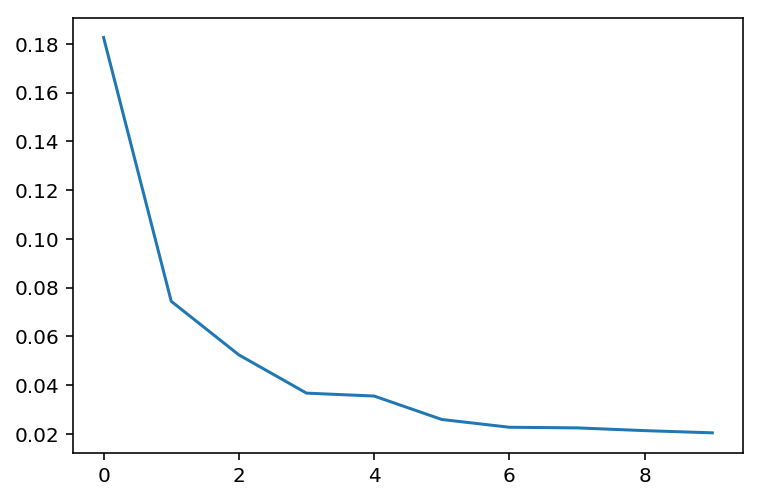

In [42]:
plt.plot(pca.explained_variance_ratio_[:10])

In [43]:
pca.explained_variance_ratio_.cumsum()

array([0.18267704, 0.25711449, 0.30956399, 0.34631449, 0.38187092,
       0.40781363, 0.43055712, 0.45304568, 0.47440904, 0.49486713,
       0.51326456, 0.53036791, 0.54690441, 0.56284925, 0.57760464,
       0.58972155, 0.60138506, 0.61267763, 0.62329361, 0.63349383,
       0.64266474, 0.65145827, 0.65944748, 0.66729532, 0.67499562,
       0.6815323 , 0.6879318 , 0.6941173 , 0.70014779, 0.70597728,
       0.71160472, 0.71690179, 0.72191846, 0.72672819, 0.73132041,
       0.73583369, 0.7401635 , 0.74434971, 0.74847395, 0.75249575,
       0.75644885, 0.76034406, 0.76417559, 0.76792608, 0.77165095,
       0.77527941, 0.77877964, 0.78216622, 0.78547759, 0.78874982,
       0.79191248, 0.79503696, 0.79815763, 0.80116941])

In [46]:
# Преобразуем исходные данные (и тренировку, и тест), используя главные компоненты
pca = PCA(n_components=0.8).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [48]:
y_pred_logreg = LogisticRegression(random_state=1, solver='sag', max_iter=1000).fit(X_train_pca, y_train).predict_proba(X_test_pca)

In [49]:
# Качество улучшилось, но не сильно
y_score_logreg = y_pred_logreg[:, 1]
print(roc_auc_score(y_test, y_score_logreg))

0.7505155658134453


In [50]:
# Попробуем поискать оптимальное сочетание параметров с помощью GridSearchCV
# Что такое warm_start и параметр C, можно почитать в документации (расскажу позже)
from sklearn.model_selection import GridSearchCV
parameters = {'warm_start':(True, False), 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr = LogisticRegression(random_state=1, solver='sag', max_iter=1000)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'warm_start': (True, False), 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
# Вот такие параметры получились
clf.best_params_

{'C': 0.001, 'warm_start': True}

In [56]:
# Ещё немного увеличили ROC AUC. Всё равно есть к чему стремиться
y_pred_logreg = LogisticRegression(random_state=1, solver='sag', max_iter=1000, C=0.001, warm_start=True).fit(X_train_pca, y_train).predict_proba(X_test_pca)

y_score_logreg = y_pred_logreg[:, 1]
print(roc_auc_score(y_test, y_score_logreg))

0.7525457731617274


In [57]:
y_pred_log = LogisticRegression(random_state=1, solver='sag', max_iter=1000, C=0.001, warm_start=True).fit(X_train_pca, y_train).predict(X_test_pca)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_log))
print("Precision:", metrics.precision_score(y_test, y_pred_log))
print("Recall:", metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.9211914365497983
Precision: 0.25
Recall: 0.003968253968253968


In [58]:
sum(y_test)

252.0

In [59]:
len(y_test)

3223

In [61]:
# Строим матрицу значений TP, FP, FN, TN
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log).ravel()
(tn, fp, fn, tp)

(2968, 3, 251, 1)

In [64]:
# Увы, из 252 абонентов, которые сменили тариф, наша модель нашла только одного.
# При этом ложных срабатываний не так много -- всего 3.
confusion_matrix(y_test, y_pred_log, labels=[1, 0]).T

array([[   1,    3],
       [ 251, 2968]])